In [2]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [3]:

# Step 2: Load dataset
iris = load_iris()
X = iris.data  # input features
y = iris.target  # labels (not used in PCA but useful for plotting)

In [4]:
# Step 3: Standardize the data (PCA works better when data is scaled)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:

# Step 4: Calculate Covariance Matrix
cov_matrix = np.cov(X_scaled.T)  # Transpose because we need features as rows
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [6]:

# Step 5: Calculate Eigenvalues and Eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigen_values)
print("\nEigenvectors (Principal Components):\n", eigen_vectors)


Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors (Principal Components):
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [7]:
# Step 6: Sort eigenvectors by eigenvalues (descending order)
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_indices]
eigen_vectors = eigen_vectors[:, sorted_indices]

In [10]:

# Step 7: Choose top k eigenvectors (let's say k=2 for 2D plot)
k = 2
top_k_vectors = eigen_vectors[:, :k]
top_k_vectors

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [11]:

# Step 8: Transform the data (Project it onto the new axes)
X_pca = X_scaled.dot(top_k_vectors)

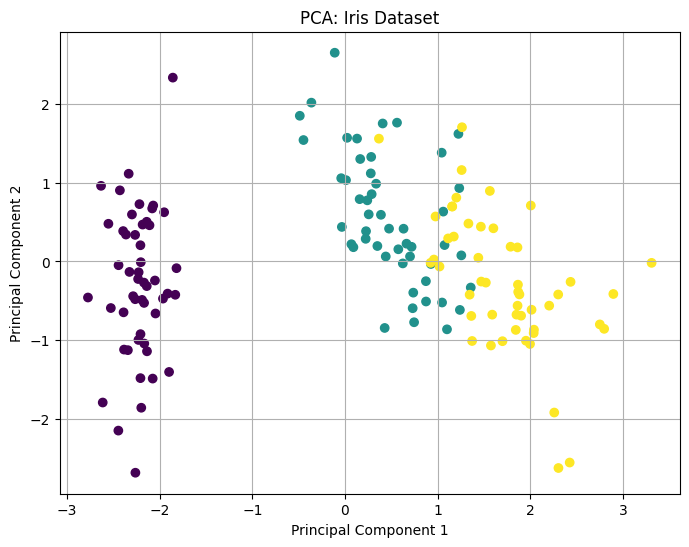

In [12]:

# Step 9: Plot the result
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Iris Dataset")
plt.grid(True)
plt.show()